<a href="https://colab.research.google.com/github/sdasmaha/Projects/blob/main/nystock_rnn_and_lstm_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv
/kaggle/input/nyse/fundamentals.csv


In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
price_adj_df = pd.read_csv("/kaggle/input/nyse/prices-split-adjusted.csv", index_col=0)
price_adj_df

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...
2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0


In [ ]:
price_adj_df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [ ]:
price_adj_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 2016-01-05 to 2016-12-30
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  851264 non-null  object 
 1   open    851264 non-null  float64
 2   close   851264 non-null  float64
 3   low     851264 non-null  float64
 4   high    851264 non-null  float64
 5   volume  851264 non-null  float64
dtypes: float64(5), object(1)
memory usage: 45.5+ MB


In [ ]:
price_adj_df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [ ]:
price_adj_df.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


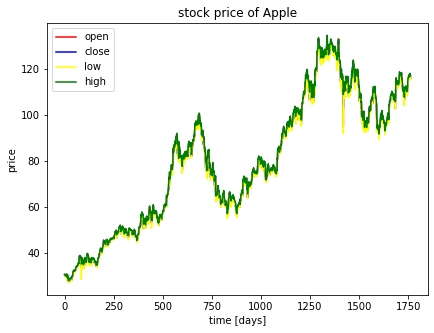

In [ ]:
# visualize
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(price_adj_df[price_adj_df.symbol == "AAPL"].open.values, color='red', label='open')
plt.plot(price_adj_df[price_adj_df.symbol == "AAPL"].close.values, color='blue', label='close')
plt.plot(price_adj_df[price_adj_df.symbol == "AAPL"].low.values, color='yellow', label='low')
plt.plot(price_adj_df[price_adj_df.symbol == "AAPL"].high.values, color='green', label='high')
plt.title('stock price of Apple')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend()

#plt.subplot(1, 2, 2)
#plt.plot()
#plt.title('stock volume')

In [ ]:
# function to create train, validation, test data given stck data and sequence length
def load_data(stock, seq_len):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])
        
    data = np.array(data)
    val_size = int(np.round(0.1*data.shape[0]))
    test_size = int(np.round(0.2*data.shape[0]))
    train_size = int(np.round(0.8*data.shape[0]))
    
    x_train = np.asarray(data[:train_size, :-1, :]).astype(np.float32)
    y_train = np.asarray(data[:train_size, -1, :]).astype(np.float32)
    
    x_valid = np.asarray(data[train_size:train_size+val_size, :-1, :]).astype(np.float32)
    y_valid = np.asarray(data[train_size:train_size+val_size, -1, :]).astype(np.float32)
    
    x_test = np.asarray(data[train_size+val_size:, :-1, :]).astype(np.float32)
    y_test = np.asarray(data[train_size+val_size:, -1, :]).astype(np.float32)
    
    return (x_train, y_train, x_valid, y_valid, x_test, y_test)

In [ ]:
# choose one stock
aapl_stock = price_adj_df[price_adj_df.symbol == 'AAPL'].copy()
aapl_stock.drop(['symbol'], axis=1, inplace=True)
aapl_stock.drop(['volume'], axis=1, inplace=True)
cols = aapl_stock.columns.values
print(cols)

['open' 'close' 'low' 'high']


In [ ]:
# normalize stock
aapl_stock_norm = aapl_stock.copy()
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0,1))
aapl_stock_norm['open'] = min_max_scaler.fit_transform(aapl_stock_norm.open.values.reshape(-1, 1))
aapl_stock_norm['close'] = min_max_scaler.fit_transform(aapl_stock_norm.close.values.reshape(-1, 1))
aapl_stock_norm['high'] = min_max_scaler.fit_transform(aapl_stock_norm.high.values.reshape(-1, 1))
aapl_stock_norm['low'] = min_max_scaler.fit_transform(aapl_stock_norm.low.values.reshape(-1, 1))


In [ ]:
# create train, test data
seq_len = 15 # choose sequence length
x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(aapl_stock_norm, seq_len)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_valid.shape = ',x_valid.shape)
print('y_valid.shape = ', y_valid.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (1398, 14, 4)
y_train.shape =  (1398, 4)
x_valid.shape =  (175, 14, 4)
y_valid.shape =  (175, 4)
x_test.shape =  (174, 14, 4)
y_test.shape =  (174, 4)


Text(0.5, 0, 'time [days]')

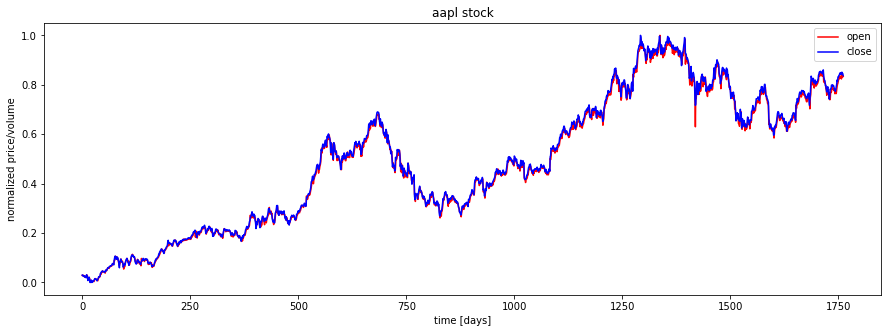

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(aapl_stock_norm.open.values, color='red', label='open')
plt.plot(aapl_stock_norm.close.values, color='blue', label='close')
plt.legend()
plt.title('aapl stock')
plt.ylabel('normalized price/volume')
plt.xlabel('time [days]')

In [ ]:
# Basic Cell RNN in keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# build model
rnn_model = keras.Sequential()

rnn_model.add(layers.SimpleRNN(32, input_shape=(14, 4), return_sequences=True))
rnn_model.add(layers.SimpleRNN(32, return_sequences=False))
rnn_model.add(layers.Dense(4))
#rnn_model.add(layers.Activation('softmax'))

rnn_model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_20 (SimpleRNN)    (None, 14, 32)            1184      
_________________________________________________________________
simple_rnn_21 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 132       
Total params: 3,396
Trainable params: 3,396
Non-trainable params: 0
_________________________________________________________________


In [ ]:
adam = optimizers.Adam(lr = 0.001)
rnn_model.compile(loss = 'mean_squared_error', optimizer=adam,
             metrics = ['accuracy'])

In [ ]:
# train network
rnn_model.fit(x_train, y_train, batch_size = 32,
         epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
44/44 [==============================] - 1s 18ms/step - loss: 0.0312 - accuracy: 0.2976 - val_loss: 0.0017 - val_accuracy: 0.4514
Epoch 2/20
44/44 [==============================] - 0s 10ms/step - loss: 0.0013 - accuracy: 0.3062 - val_loss: 0.0011 - val_accuracy: 0.2286
Epoch 3/20
44/44 [==============================] - 0s 10ms/step - loss: 7.6745e-04 - accuracy: 0.2768 - val_loss: 9.6769e-04 - val_accuracy: 0.3314
Epoch 4/20
44/44 [==============================] - 0s 10ms/step - loss: 6.6476e-04 - accuracy: 0.2797 - val_loss: 8.5329e-04 - val_accuracy: 0.2229
Epoch 5/20
44/44 [==============================] - 0s 10ms/step - loss: 5.4041e-04 - accuracy: 0.2854 - val_loss: 8.1190e-04 - val_accuracy: 0.2571
Epoch 6/20
44/44 [==============================] - 0s 10ms/step - loss: 4.4688e-04 - accuracy: 0.3011 - val_loss: 7.5285e-04 - val_accuracy: 0.2800
Epoch 7/20
44/44 [==============================] - 0s 10ms/step - loss: 3.9532e-04 - accuracy: 0.3083 - val_loss: 8.7917e

open  Test Score: 1.34 RMSE
close  Test Score: 2.31 RMSE
low  Test Score: 2.19 RMSE
high  Test Score: 1.91 RMSE


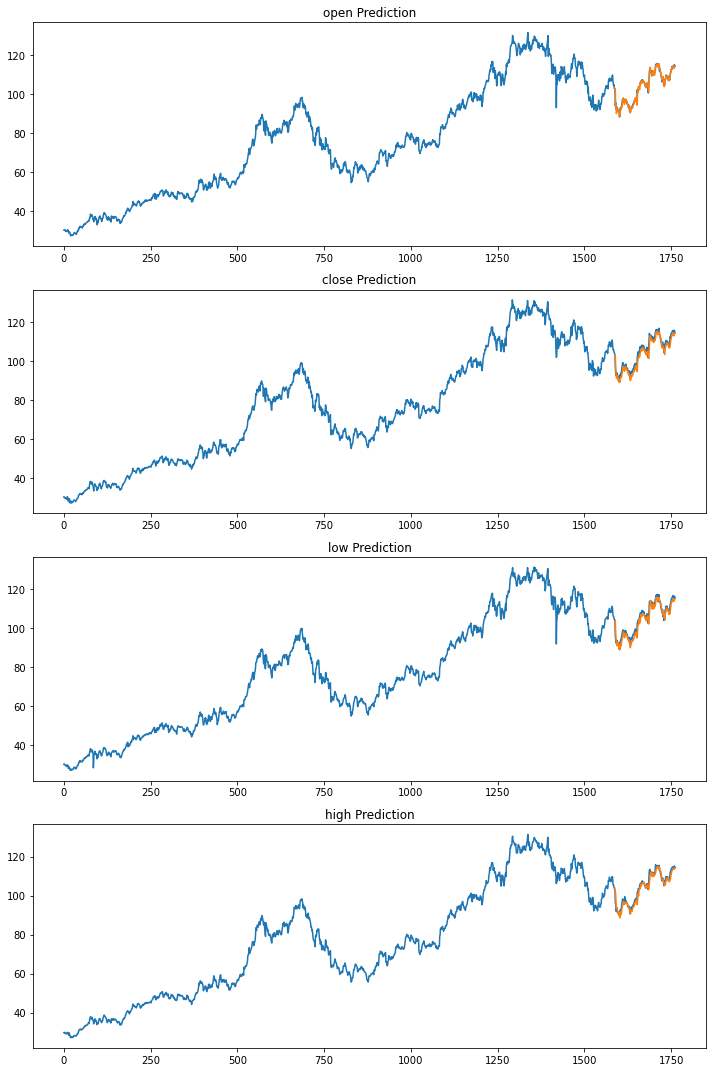

In [ ]:
# predict and plot
rnn_preds = rnn_model.predict(x_test)
col_lst = list(aapl_stock_norm.columns)
figure, axes = plt.subplots(4,1,figsize=(10, 15))

for (i, col_name) in enumerate(col_lst):
    rnn_preds_col = min_max_scaler.inverse_transform(rnn_preds[:,i].reshape(-1,1))
    Ytest = min_max_scaler.inverse_transform(y_test[:,i].reshape(-1,1))

    testScore = math.sqrt(mean_squared_error(Ytest, rnn_preds_col))
    print(col_name, ' Test Score: %.2f RMSE' % (testScore))

    data = aapl_stock_norm[col_name].values.reshape(-1,1)
    data = np.reshape(data, (data.shape[0], 1))
    testPredictPlot = np.empty_like(data)
    testPredictPlot[:] = np.nan
    testPredictPlot[len(aapl_stock_norm[col_name])-len(rnn_preds_col)-1:len(aapl_stock_norm['close'])-1] = rnn_preds_col
    
    axes[i].plot(min_max_scaler.inverse_transform(aapl_stock_norm[col_name].values.reshape(-1,1)))
    axes[i].plot(testPredictPlot)
    axes[i].set_title(col_name +' Prediction')
    plt.tight_layout()
    #plt.plot(rnn_preds)

In [ ]:
# LSTM in keras
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(200, input_shape=(14, 4), return_sequences=False))
#lstm_model.add(layers.LSTM(80))
lstm_model.add(layers.Dense(4))
lstm_model.summary()

adam = optimizers.Adam(lr = 0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=adam,
                  metrics=["accuracy"])

lstm_model.fit(x_train, y_train, epochs=30,
              batch_size=32, verbose=1,
              validation_data=(x_valid, y_valid))

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 200)               164000    
_________________________________________________________________
dense_24 (Dense)             (None, 4)                 804       
Total params: 164,804
Trainable params: 164,804
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
44/44 [==============================] - 2s 39ms/step - loss: 0.0138 - accuracy: 0.3426 - val_loss: 0.0015 - val_accuracy: 0.5029
Epoch 2/40
44/44 [==============================] - 1s 28ms/step - loss: 5.5404e-04 - accuracy: 0.3798 - val_loss: 9.5402e-04 - val_accuracy: 0.3600
Epoch 3/40
44/44 [==============================] - 1s 27ms/step - loss: 4.5192e-04 - accuracy: 0.4056 - val_loss: 8.8511e-04 - val_accuracy: 0.5029
Epoch 4/40
44/44 [==============================] - 1s 27ms/step - los

open  Test Score: 2.38 RMSE
close  Test Score: 1.84 RMSE
low  Test Score: 1.99 RMSE
high  Test Score: 2.01 RMSE


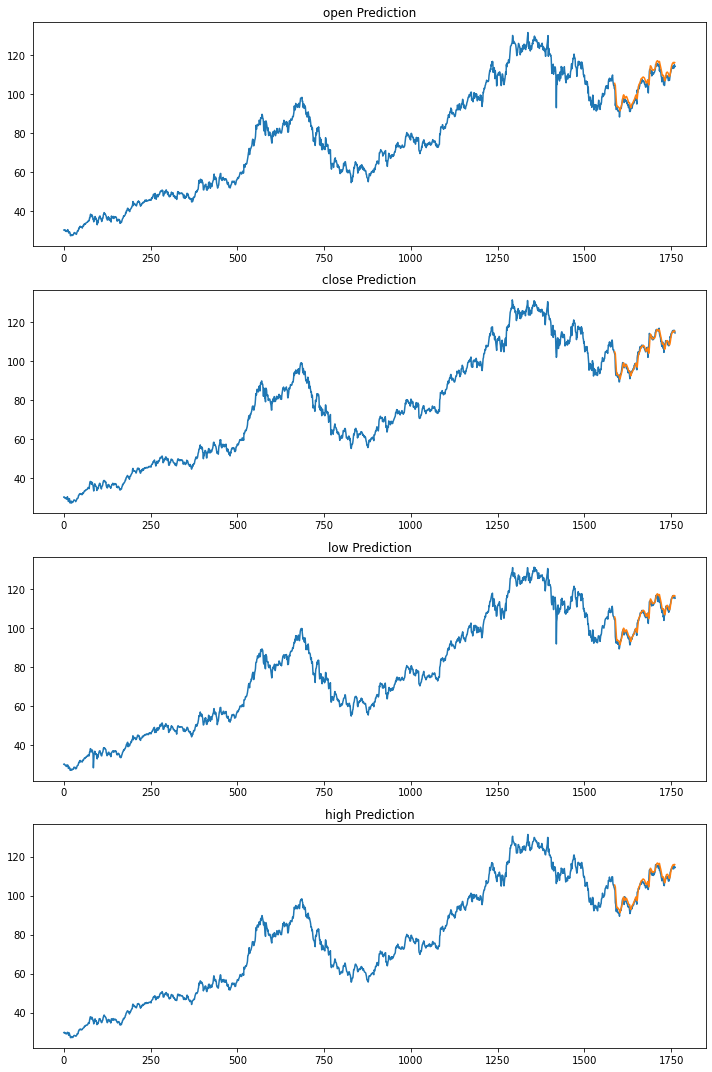

In [ ]:
# predict and plot
lstm_preds = lstm_model.predict(x_test)

col_lst = list(aapl_stock_norm.columns)
figure, axes = plt.subplots(4,1,figsize=(10, 15))

for (i, col_name) in enumerate(col_lst):
    lstm_preds_col = min_max_scaler.inverse_transform(lstm_preds[:,i].reshape(-1,1))
    Ytest = min_max_scaler.inverse_transform(y_test[:,i].reshape(-1,1))

    testScore = math.sqrt(mean_squared_error(Ytest, lstm_preds_col))
    print(col_name, ' Test Score: %.2f RMSE' % (testScore))

    data = aapl_stock_norm[col_name].values.reshape(-1,1)
    data = np.reshape(data, (data.shape[0], 1))
    testPredictPlot = np.empty_like(data)
    testPredictPlot[:] = np.nan
    testPredictPlot[len(aapl_stock_norm[col_name])-len(lstm_preds_col)-1:len(aapl_stock_norm['close'])-1] = lstm_preds_col
    
    axes[i].plot(min_max_scaler.inverse_transform(aapl_stock_norm[col_name].values.reshape(-1,1)))
    axes[i].plot(testPredictPlot)
    axes[i].set_title(col_name +' Prediction')
    plt.tight_layout()
    #plt.plot(rnn_preds)

In [ ]:
# cross validation with lstm
lstm_model = keras.Sequential()
lstm_model.add(layers.LSTM(200, input_shape=(19, 4)))
lstm_model.add(layers.Dense(4))
lstm_model.summary()

adam = optimizers.Adam(lr = 0.001)
lstm_model.compile(loss='mean_squared_error', optimizer=adam,
                  metrics=["accuracy"])

lstm_model.fit(x_train, y_train, epochs=20,
              batch_size=32, verbose=1,
              validation_data=(x_valid, y_valid))

In [ ]:
## Basic Cell RNN in tensorflow

index_in_epoch = 0
perm_array = np.arange(x_train.shape[0]) # 0부터 x_train길이까지
np.random.shuffle(perm_array)

# function to get the next batch
def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch +=batch_size
    
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
        
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# parameters
n_steps = seq_len-1
n_inputs = 4
n_neurons = 200
n_outputs = 4
n_layers = 3
learning_rate = 0.001
batch_size = 64
n_epochs = 100
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_outputs])

# use Basic RNN Cell
layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                     activation=tf.nn.elu)
         for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
rnn_outputs, states = tf.nn.dynamic_rnn(multi_layer_cell)


class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        
        self.i2h = nn.Linear(n_categories + input_size + hidden_size,
                            hidden_size)
        self.i2o


In [ ]:
# LSTM in pytorch
import torch
import torch.nn as nn

x_train = torch.FloatTensor(x_train).view(-1)